[link](https://apps.skillfactory.ru/learning/course/course-v1:SkillFactory+DST-3.0+28FEB2021/block-v1:SkillFactory+DST-3.0+28FEB2021+type@sequential+block@29ed5429ee004272a1a9316d6f1c9b31/block-v1:SkillFactory+DST-3.0+28FEB2021+type@vertical+block@2113de4f722e4c0b962b668c6aac21e7)

Важной характеристикой алгоритма машинного обучения является его обобщающая способность — способность использовать знания, полученные при обучении, на новых данных.

Обобщающая способность часто страдает из-за двух основных проблем машинного обучения: overfitting (переобучение) и underfitting (недообучение).

Переобучение (overfitting) — это проблема, при которой модель чувствительна к незначительным колебаниям в данных в процессе обучения. По сути, такая модель работает намного лучше с обучающими данными, чем с новыми. Она была чрезмерно натренирована на обнаружение уникальных характеристик обучающего набора данных, которые не являются общими закономерностями.

Недообучение (underfitting) — это проблема, при которой алгоритм недостаточно хорошо изучил данные и пропускает важные зависимости между признаками. В случае недообучения мы даже на обучающих данных не можем достичь приемлемых оценок для модели.

Недообучение и переобучение неразрывно связаны друг с другом: попытка бороться с одной проблемой может привести к возникновению другой, поэтому возникает дилемма смещения-разброса (bias-variance tradeoff). 

Смещение (bias) — это математическое ожидание (обозначено далее как ) разности между истинным ответом и ответом, выданным моделью. То есть это ожидаемая ошибка модели.

Bias — это теоретическая характеристика недообучения.

Разброс (variance) — это вариативность ошибки, то, насколько ошибка будет отличаться, если обучать модель на разных наборах данных. Математически это дисперсия (разброс) ответов модели (обозначено далее как ).

Variance — это теоретическая характеристика переобучения.

Примечание. Определения, приведённые выше, справедливы для задачи регрессии. В задаче классификации тоже есть формальное определение bias и variance, а также теоретические результаты разложения ошибки на эти компоненты. Теоретические результаты разложения ошибки на bias и variance для регрессии и классификации можно посмотреть [здесь](http://rasbt.github.io/mlxtend/user_guide/evaluate/bias_variance_decomp/).

В случае задачи регрессии underfitting и overfitting можно проиллюстрировать следующим образом:

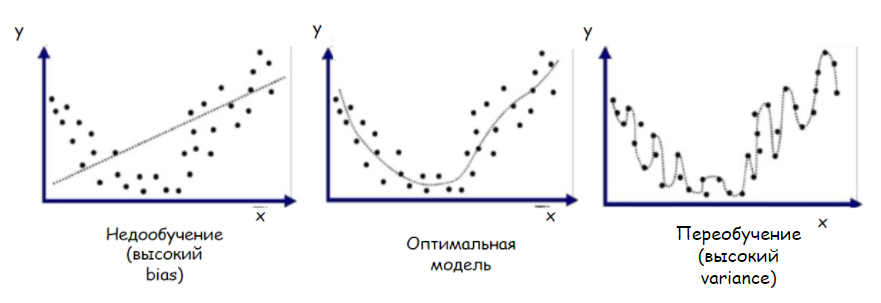

На первом графике изображена простая модель линейной регрессии, не способная уловить сложную зависимость в данных. На втором — оптимальная модель, которая хорошо описывает зависимость и при этом не имеет переобучения (полином четвёртой степени). На последнем графике изображён полином 27 степени, который подстроился под каждую точку в тренировочном наборе, но не смог уловить общие закономерности.

Underfitting и overfitting в случае задачи классификации:

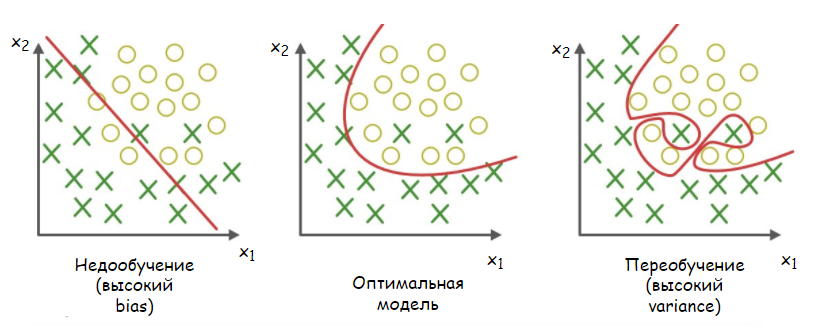

На рисунке изображены три различные модели: первая — простая логистическая регрессия, вторая — логистическая регрессия, обученная на полиномиальных признаках второй степени, третья — логистическая регрессия, обученная на полиномиальных признаках десятой степени. Видно, что первая модель обладает низким качеством и не обобщает общей зависимости (у неё высокое смещение). Третья же, напротив, идеально выделяет каждое наблюдение в правильный класс, но является переобученной и также не отражает общей зависимости (у неё высокий разброс). Оптимальной моделью является вторая, которая не подстраивается под индивидуальные наблюдения и отражает общую зависимость в данных.

Проблема заключается в том, что в реальных условиях построить визуализацию модели, подобную приведённым выше, невозможно из-за размерности данных (если только мы не применим методы понижения размерности). Поэтому нужно уметь обнаруживать недообучение и переобучение другими способами.

Если с недообучением всё понятно (измеряем метрику на тренировочной выборке и, если она нас не устраивает, делаем вывод, что модель недообучена), то с переобучением всё несколько сложнее. Переобучение является наиболее популярной проблемой, поэтому её необходимо уметь обнаруживать.



КАК ОБНАРУЖИТЬ ПЕРЕОБУЧЕНИЕ

Переобучение легко детектируется с помощью изученных нами методов валидации: мы намеренно разбиваем выборку на тренировочную и валидационную (возможно, и тестовую) и смотрим на значения показателей на каждой из выборок, сравнивая их между собой.

Основные способы отследить переобучение:

* hold-out-разбиение,
* k-fold-валидация и leave-one-out-валидация,
* кривые обучения (learning curves).

Если качество на валидационной выборке стабильно хуже качества на тренировочной, то это явный признак переобучения.

Сначала проверим модель на переобучение с помощью отложенной (hold-out) выборки.

In [ ]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
#Создаём модель
model_bad = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    class_weight='balanced', #веса классов
    random_state=42 #генератор случайных чисел
)
#Обучаем модель на тренировочной выборке
model_bad.fit(X_train, y_train)
#Делаем предсказание для каждой из выборок
y_train_pred = model_bad.predict(X_train)
y_valid_pred = model_bad.predict(X_valid)
#Выводим значения метрик для тренировочной выборки
print('Train F1 score: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
#Выводим значения метрик для валидационной выборки
print('Valid F1 score: {:.2f}'.format(metrics.f1_score(y_valid, y_valid_pred)))
 
# Train F1 score: 1.00
# Valid F1 score: 0.67

Значение -score на тренировочной выборке показывает, что задача классификации образцов воды на пригодные и непригодные для питья решена идеально. Метрика равна максимуму — 1, а значит, и precision и recall для каждого из классов равны 1 (значит, и значения всех остальных метрик тоже максимальны). То есть модель правильно определила класс для всех образцов воды из набора данных.

Однако значение -score, полученное на валидационной выборке, менее оптимистично. Значение метрики на контроле значительно ниже, чем при обучении.

Это типичная картина переобучения: модель дерева решений полностью адаптировалась под обучающий набор данных, но не нашла общих закономерностей, поэтому результаты на контроле оставляют желать лучшего.

In [2]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
 
from sklearn import metrics #метрики
from sklearn import model_selection #методы разделения и валидации
from sklearn import linear_model #линейные модели
from sklearn import tree #деревья решений
plt.style.use('seaborn-v0_8') #стиль отрисовки seaborn
%matplotlib inline

Train accuracy: 0.98
Valid accuracy: 0.83


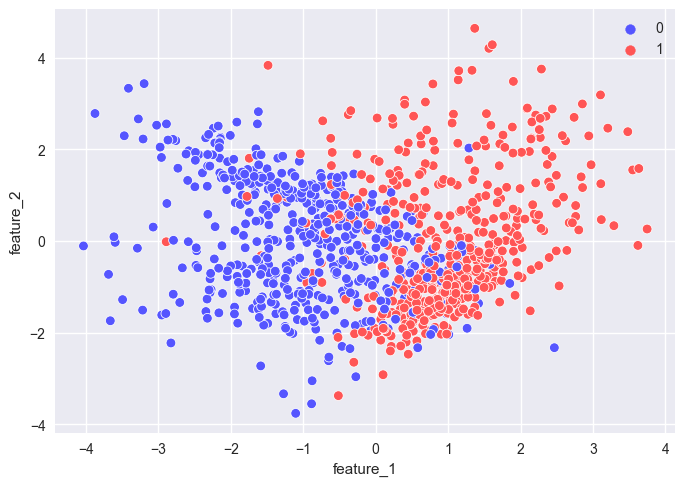

In [4]:
#4.3
'''Разделите исходный набор данных на тренировочную и валидационную выборки в соотношении 70/30, используя функцию train_test_split(). В качестве значения параметра random_state возьмите число 42.

Обучите модель дерева решений с глубиной 10 (остальные параметры оставьте по умолчанию) для решения задачи классификации на тренировочной выборке. Сделайте предсказания для тренировочной и валидационной выборок и рассчитайте метрику accuracy.

В качестве ответа укажите значение метрики accuracy на тренировочной и валидационной выборках. Ответ округлите до двух знаков после точки-разделителя.
'''

from sklearn import datasets
X, y = datasets.make_classification(
    n_samples=1000, #количество объектов
    n_features=2, #количество признаков
    n_informative=2, #количество информативных признаков
    n_redundant=0, #количество неинформативных признаков
    n_classes=2, #количество классов
    n_clusters_per_class=2, #количество кластеров внутри класса
    random_state=1 #генератор случайных чисел
)
X = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
y = pd.Series(y)
sns.scatterplot(x=X['feature_1'], y=X['feature_2'], hue=y, palette='seismic');
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)
clf = tree.DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_valid_pred = clf.predict(X_valid)
print('Train accuracy: {:.2f}'.format(metrics.accuracy_score(y_train, y_train_pred)))
print('Valid accuracy: {:.2f}'.format(metrics.accuracy_score(y_valid, y_valid_pred)))

In [5]:
plot_probabilities_2d(X, y, clf)

NameError: name 'plot_probabilities_2d' is not defined

МЕТОДЫ БОРЬБЫ С ПЕРЕОБУЧЕНИЕМ

Мы посмотрели, как с помощью методов валидации можно определить наличие переобучения. Но как с ним бороться?

Существует несколько основных способов, и с каждым из них мы уже знакомились в нашем курсе. Ключевая идея, заложенная в каждом из методов, звучит так: снизить переобучение = уменьшить разброс (вариативность) ошибки модели:

1

УМЕНЬШЕНИЕ СЛОЖНОСТИ МОДЕЛИ

Это основной способ борьбы с переобучением, так как, по сути, повышенная сложность модели и является его причиной.

Рекомендации по уменьшению сложности моделей:

Для линейной (логистической) регрессии с полиномиальными признаками уменьшение сложности модели означает понижение степени полинома.

Ниже приведены три полиномиальных модели, которые решают одну и ту же задачу, — полином первой (простая линейная регрессия), четвёртой и пятнадцатой степени. Для каждой модели рассчитана MSE (средний квадрат ошибки) между предсказанными значениями и истинной функцией. Видно, что наименьшей ошибкой обладает полином четвёртой степени.

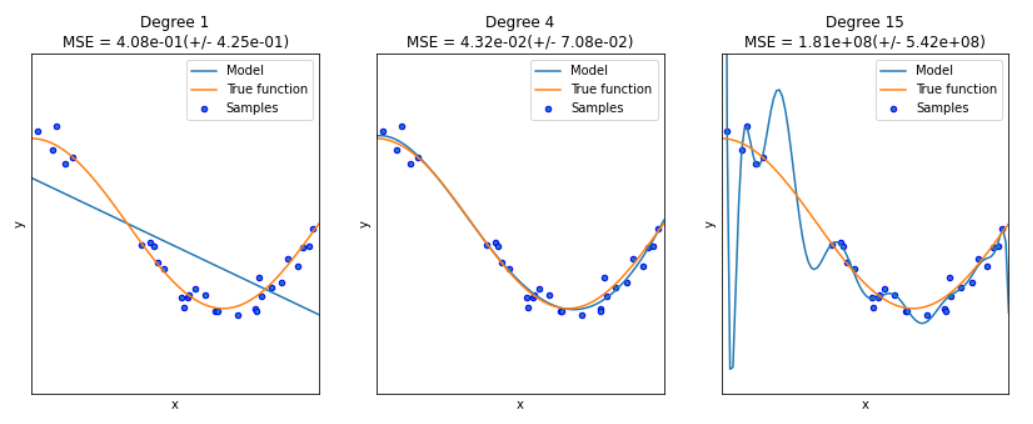

Для деревьев решений — «стрижка» (pruning) деревьев, то есть уменьшение их глубины (max_depth) и/или увеличение количества объектов, при которых вершина дерева превращается в лист (min_samples_leaf).

Пример переобученного дерева решений и его разделяющей поверхности до обрезки:

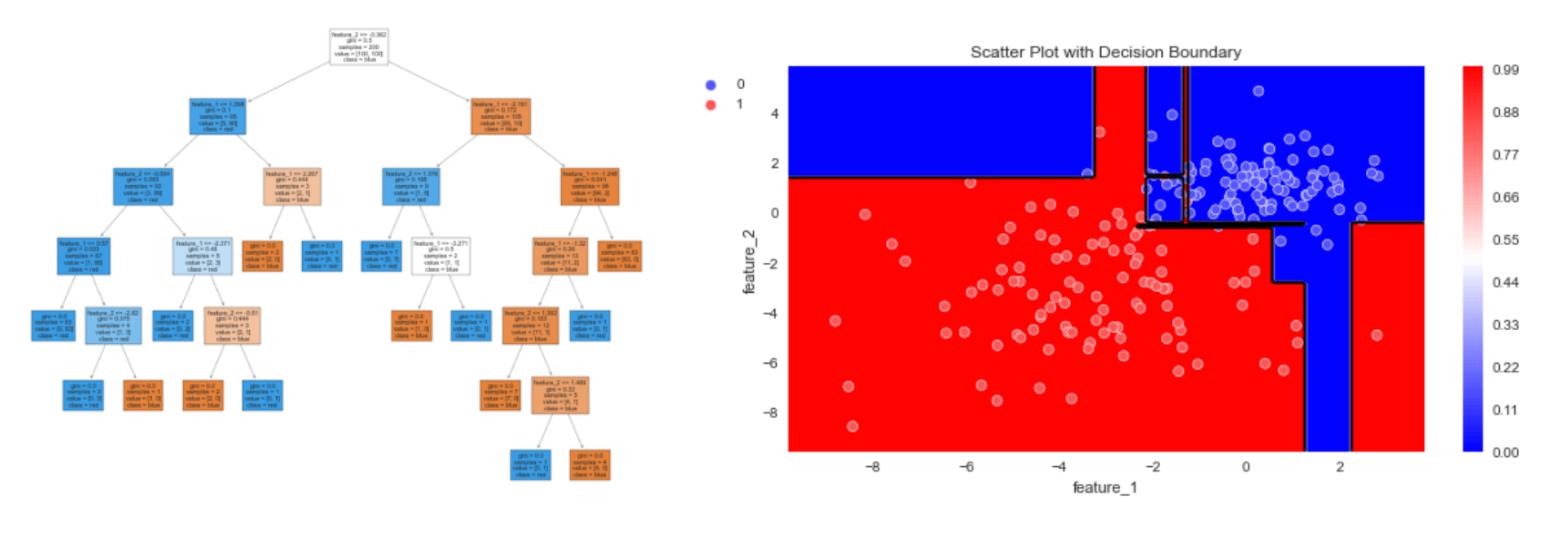

После обрезки (max_depth=3, min_samples_leaf=5):

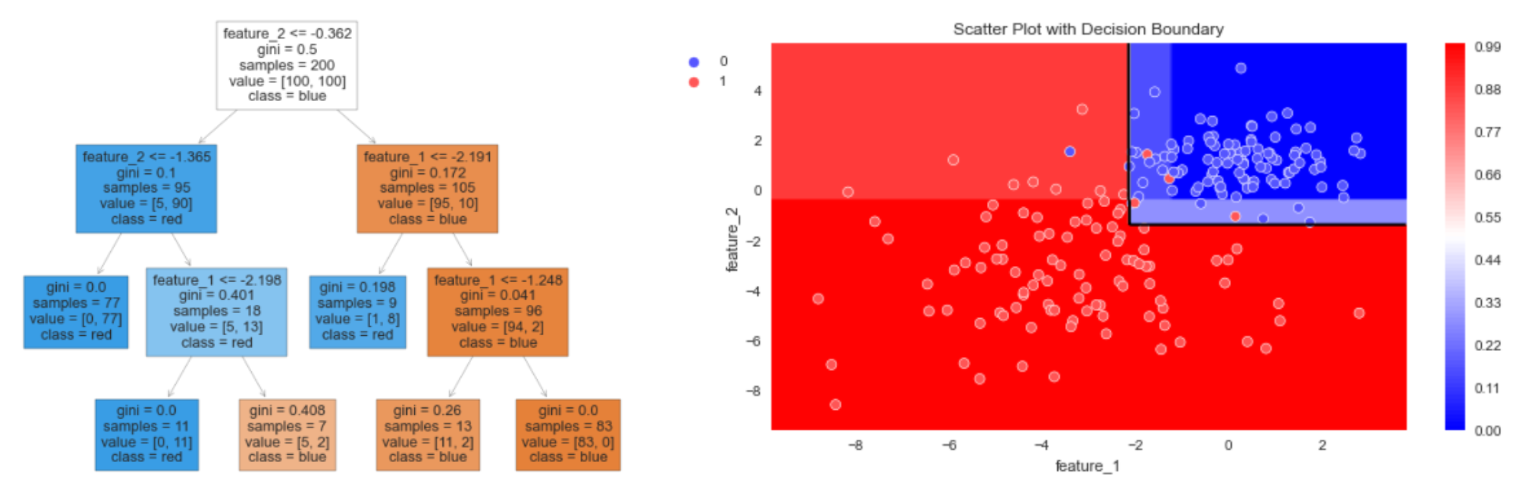

Для случайного леса — «стрижка» деревьев (max_depth и min_samples_leaf) и уменьшение количества признаков, на которых обучается каждое дерево (max_features).

2

РЕГУЛЯРИЗАЦИЯ

С помощью добавления штрафа в функцию потерь мы намеренно пытаемся увеличить смещение модели, чтобы уменьшить разброс. Закон баланса в действии!

Ранее мы изучали регуляризацию только в контексте линейных моделей, но на самом деле она есть и во многих других методах машинного обучения, с которыми мы будем знакомиться в дальнейшем.

На рисунке ниже приведено несколько примеров одной и той же модели — полинома восьмой степени с различными коэффициентами регуляризации (обозначен как ). Видно, что чем выше , тем меньше переобучение. Однако есть риск увеличить  слишком сильно, и тогда модель превратится в недообученную (правый нижний рисунок).

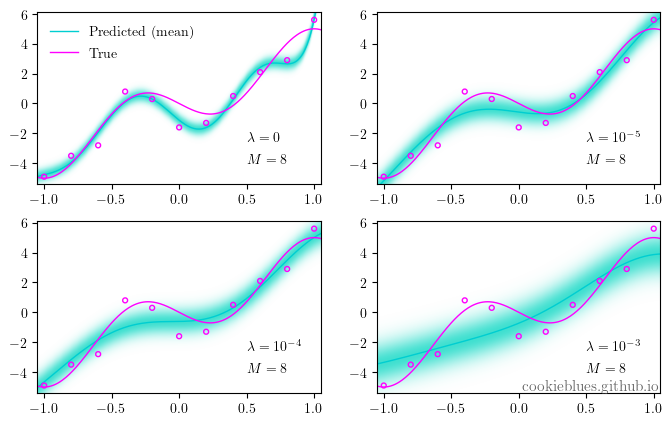

3
МАНИПУЛЯЦИИ С ДАННЫМИ

Ещё один верный способ побороть переобучение — увеличить или уменьшить количество примеров, на которых обучается модель.

Увеличивать набор данных можно за счёт проведения новых экспериментов и сбора новой информации.
Уменьшать набор данных можно за счёт удаления выбросов и аномалий из обучающего набора данных, из-за которых отчасти и происходит переобучение модели.
Также можно отбирать наиболее значимые признаки, которые в наибольшей степени влияют на предсказания модели.

О применении метода работы с данными мы поговорим в следующем модуле.

4.6 Обучите модель дерева решений с глубиной 3 (остальные параметры оставьте по умолчанию) для решения задачи классификации на тренировочной выборке.

Сделайте предсказания для тренировочной и валидационной выборок и рассчитайте метрику accuracy.

В качестве ответа укажите значение метрики accuracy на тренировочной и валидационной выборках. Ответ округлите до двух знаков после точки-разделителя.

Train accuracy: 0.88
Valid accuracy: 0.85


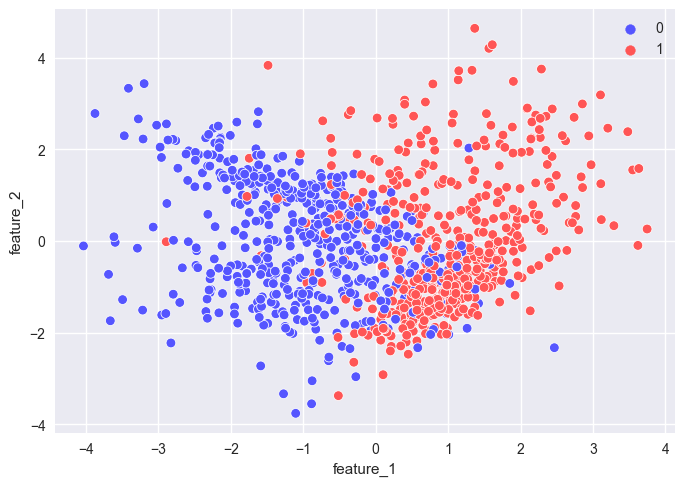

In [6]:
from sklearn import datasets
X, y = datasets.make_classification(
    n_samples=1000, #количество объектов
    n_features=2, #количество признаков
    n_informative=2, #количество информативных признаков
    n_redundant=0, #количество неинформативных признаков
    n_classes=2, #количество классов
    n_clusters_per_class=2, #количество кластеров внутри класса
    random_state=1 #генератор случайных чисел
)
X = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
y = pd.Series(y)
sns.scatterplot(x=X['feature_1'], y=X['feature_2'], hue=y, palette='seismic');
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_valid_pred = clf.predict(X_valid)
print('Train accuracy: {:.2f}'.format(metrics.accuracy_score(y_train, y_train_pred)))
print('Valid accuracy: {:.2f}'.format(metrics.accuracy_score(y_valid, y_valid_pred)))

In [7]:
plot_probabilities_2d(X, y, clf)

NameError: name 'plot_probabilities_2d' is not defined

УТЕЧКА ДАННЫХ

Стоит упомянуть об ещё одной проблеме современного машинного обучения, которая называется утечкой данных. Данная проблема несколько похожа на проблему переобучения, но имеет другой характер.

Утечка данных (data leak) — это ситуация, в которой данные, используемые для обучения модели, содержат прямую или косвенную информацию о целевой переменной.

Приведём несколько примеров, когда может возникнуть утечка данных:

1
ОЧЕВИДНЫЕ СЛУЧАИ

Наиболее очевидной ситуацией утечки данных является включение целевой переменной, которую мы пытаемся предсказать, в качестве фактора, что полностью уничтожает цель «прогнозирования». Это может быть сделано по ошибке, но важно убедиться, что целевая переменная отличается от признаков.

Другой распространённой причиной утечки данных является включение тестовых данных в данные по обучению модели, а затем использование этих же тестовых данных для оценки качества модели.

Два этих случая возникают скорее по невнимательности, и их легко обнаружить. Более опасные причины — скрытые.

2
СКРЫТЫЕ СЛУЧАИ, ИЛИ GIVEAWAY-ПРИЗНАКИ

Giveaway — это признаки, которые раскрывают информацию о целевой переменной и не будут доступны после развёртывания модели в реальных условиях. Такие признаки необходимо удалять из данных перед построением модели.

Пример № 1

Мы строим модель для прогнозирования определённого состояния здоровья человека. У нас есть признак, который указывает на то, была ли у пациента операция, связанная с тем же заболеванием, которое мы предсказываем.

Указание на хирургическое вмешательство в высокой степени предсказывает состояние здоровья, и, вероятно, эта информация будет доступна далеко не всегда (в основном в случаях рецидива).

Если мы уже знаем, что пациент перенёс операцию, что могло сказаться на состоянии здоровья, нам может даже не понадобиться прогнозирующая модель.

Пример № 2

Мы прогнозируем, продолжит ли юзер пользоваться нашим приложением после какой-то определённой даты.

Включение признаков, предоставляющих информацию о будущих посещениях приложения, опять же приведёт к утечке данных.

Мы должны использовать только признаки, описывающие предыдущие сеансы, так как информация о будущих сеансах будет недоступна после развёртывания модели.

Из-за утечки данных прогноз модели становится очень оптимистичным. Вы получаете потрясающее качество во время обучения модели, радуетесь сами и радуете своего заказчика. Однако когда дело доходит до использования модели в реальных условиях, оказывается, что у вас недостаточно данных для построения прогноза.

КАК ОБНАРУЖИТЬ УТЕЧКУ ДАННЫХ

Читайте описание признаков.

Из описания признаков всегда можно узнать полезную информацию и обнаружить утечку с помощью банальной логики. Если вы предсказываете цену товара, а в вашем наборе данных есть признак цены этого товара со скидкой, очевидно, что данный признак стоит удалить из обучающего набора данных.

Проверяйте корреляции с целевым признаком.

В процессе разведывательного анализа вы можете обнаружить признаки, которые очень сильно коррелируют с целевой переменной. Конечно, такая корреляция может быть естественной и не сопровождаться утечкой, например корреляция между количеством комнат в квартире и её ценой. Однако высокая степень корреляции между налоговой выплатой за продажу и ценой квартиры — это яркий пример утечки.

Относитесь скептически к подозрительно высокому качеству моделей.

При построении модели вас может насторожить слишком высокое качество даже самых простых моделей, которого в реальных условиях достичь не удалось бы. Это может быть сигналом о наличии утечки данных.

Поэтому для начала старайтесь строить baseline — простые модели машинного обучения, такие как логистическая регрессия.